In [1]:
import giskard

import warnings
import logging

import numpy as np
import pandas as pd
import pickle

from functions.loading import load_data

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', 500)

In [2]:
from functions.training_pipeline import training_pipeline
from functions.models import xgboost_model, catboost_model, lgbm_model

# Training parameters
restricted_features=False
save=True


models = {
        "catboost": catboost_model,
}

targets = ["cf1", "cf2", "cf3", "cf123"]
# targets = ["cf1"]

# Results containers
summary_final=[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []

In [3]:
path_cogem_trbc = "data/Refinitiv_extraction/cogem_trbc.csv"
cogem = pd.read_csv(path_cogem_trbc, sep=";")

In [4]:
cogem_reduced = cogem[[
    "Instrument", 
    "TRBC Activity Name", 
    "TRBC Industry Name",
    "TRBC Activity All Codes", 
    "TRBC Industry All Codes", 
    "TRBC Industry Group All Codes", 
    "TRBC Business Sector All Codes", 
    "TRBC Economic Sector All Codes",
    "TRBC Economic Sector All"
]]

cogem_reduced.rename(columns={
    "TRBC Activity Name":"TRBC_activity_name",
    "TRBC Industry Name":"TRBC_industry_name",
    "TRBC Activity All Codes":"TRBC_activity_all_codes",
    "TRBC Industry All Codes":"TRBC_industry_all_codes",
    "TRBC Industry Group All Codes":"TRBC_industry_group_all_codes",
    "TRBC Business Sector All Codes":"TRBC_business_sector_all_codes", 
    "TRBC Economic Sector All Codes":"TRBC_economic_sector_all_codes",
    "TRBC Economic Sector All":"TRBC_economic_sector_all"
}, inplace=True)

In [5]:
preprocessed_dataset = load_data(save=True)

data = pd.merge(
    preprocessed_dataset, cogem_reduced, how="left", left_on="company_id", right_on="Instrument"
)

data.drop(columns="Instrument", inplace=True)

data.drop(columns=['gics_sector', 'gics_group', 'gics_ind', 'gics_sub_ind', 'gics_name'], inplace=True)

In [6]:
from functions.preprocessing import outliers_preprocess
threshold_over=2.5
threshold_under=1.5

for target in ["cf1", "cf2", "cf3", "cf123"]:
    data = outliers_preprocess(
        data,
        target,
        threshold_under=threshold_under,
        threshold_over=threshold_over,
    )

cf1 (outliers preprocess): enough observations : 142
cf1 (outliers preprocess): not enough observations : 2
Number of observations dropped: 2756
cf2 (outliers preprocess): enough observations : 142
cf2 (outliers preprocess): not enough observations : 2
Number of observations dropped: 2045
cf3 (outliers preprocess): enough observations : 142
cf3 (outliers preprocess): not enough observations : 2
Number of observations dropped: 1081
cf123 (outliers preprocess): enough observations : 142
cf123 (outliers preprocess): not enough observations : 2
Number of observations dropped: 587


Files not found, constructing them
Constructing benchmark
train before imputation :  (626577, 62)
test before imputation :  (28015, 62)
train 1 :  (626577, 1155)
test 1 :  (28015, 735)
train 2 :  (626577, 1156)
test 2 :  (28015, 736)
train avant target_preprocessing :  (626577, 1156)
test avant target_preprocessing :  (28015, 736)
train apres target_preprocessing :  (19934, 1156)
test apres target_preprocessing :  (10662, 736)
train :  (19934, 1156)
test :  (10662, 736)
preprocessed :  (654592, 62)
[0.5467327839833098]
Wrong category, error
X train shape : (19934, 22)
X test shape : (10662, 22)
df test shape : (10662, 736)
df preprocessed dataset shape : (654592, 62)
Files not found, constructing them
Constructing benchmark
train before imputation :  (626577, 62)
test before imputation :  (28015, 62)
train 1 :  (626577, 1155)
test 1 :  (28015, 735)
train 2 :  (626577, 1156)
test 2 :  (28015, 736)
train avant target_preprocessing :  (626577, 1156)
test avant target_preprocessing :  (280

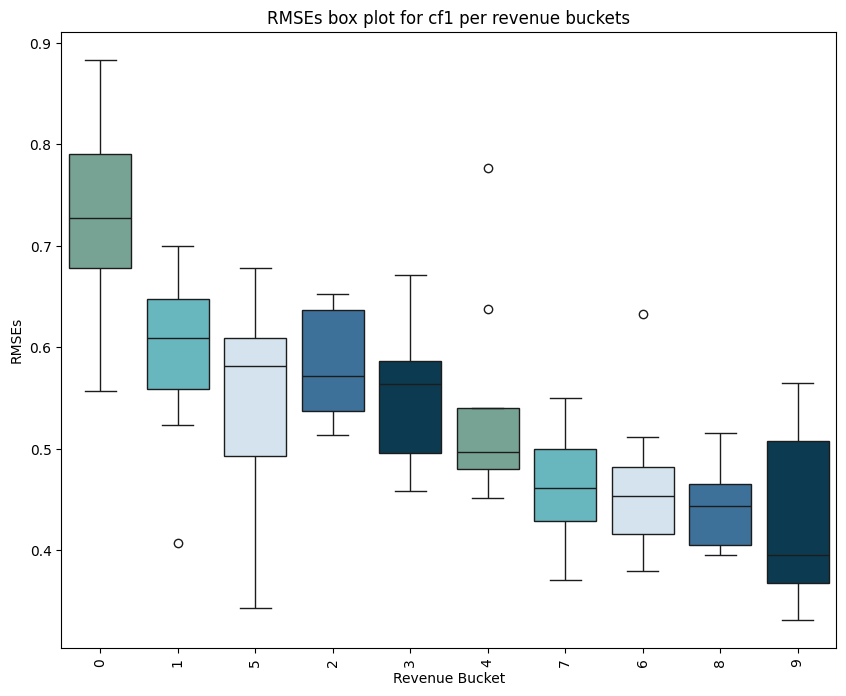

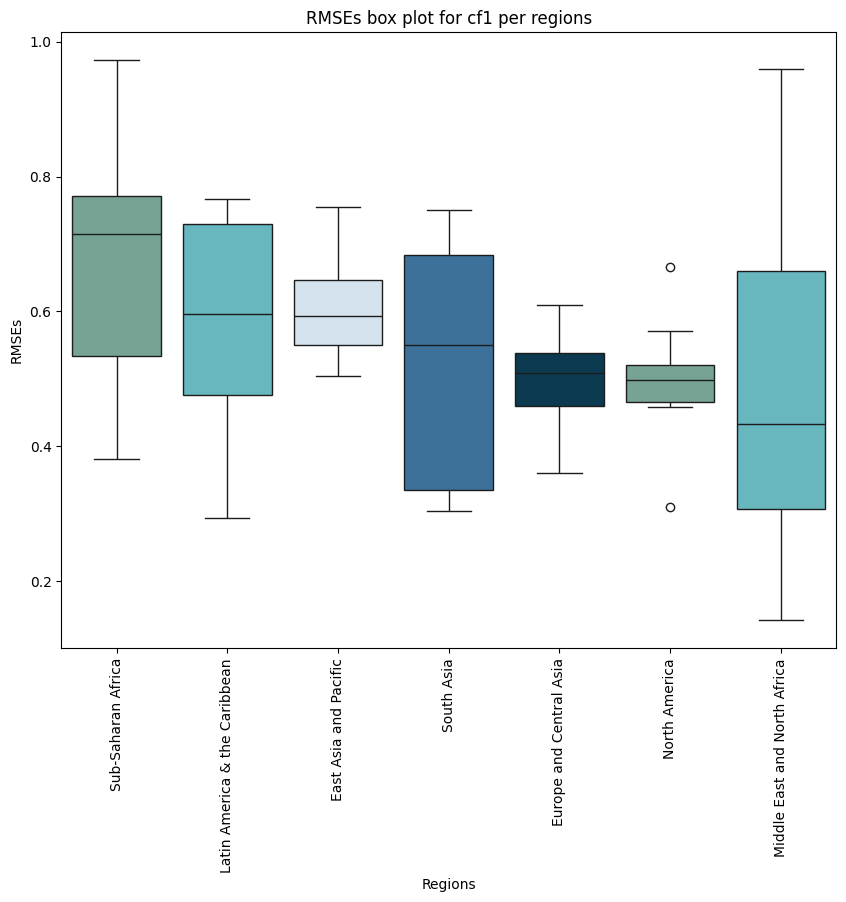

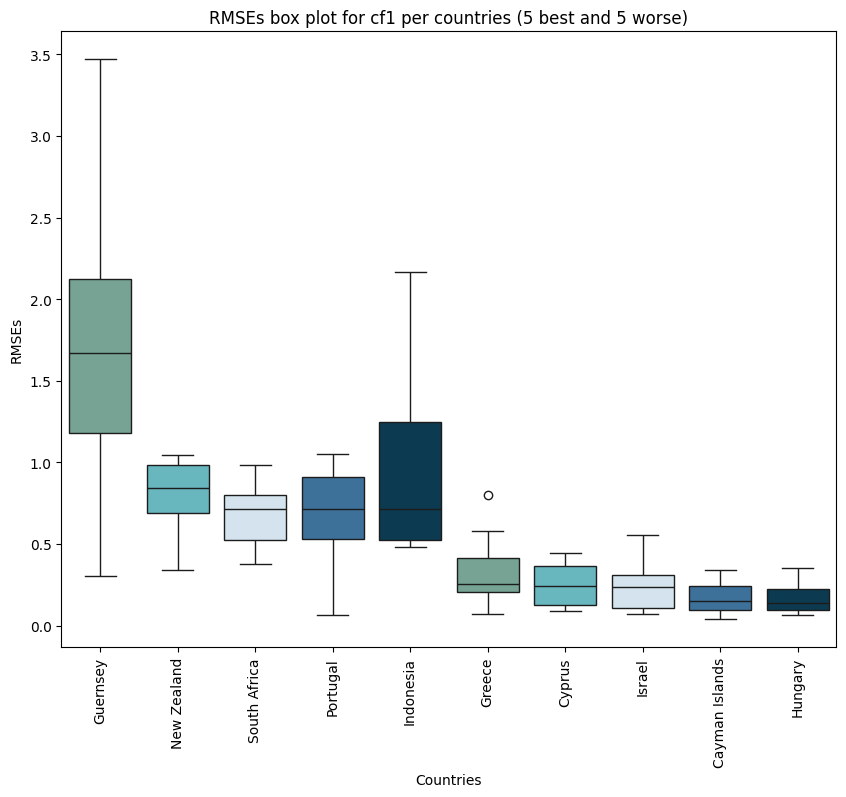

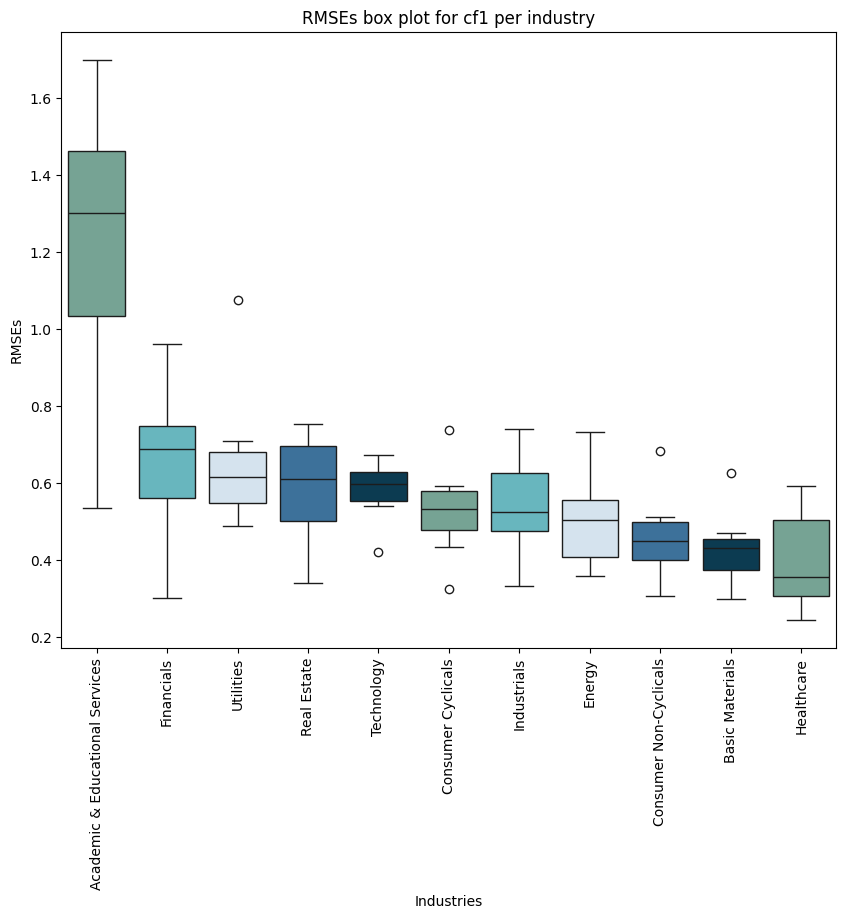

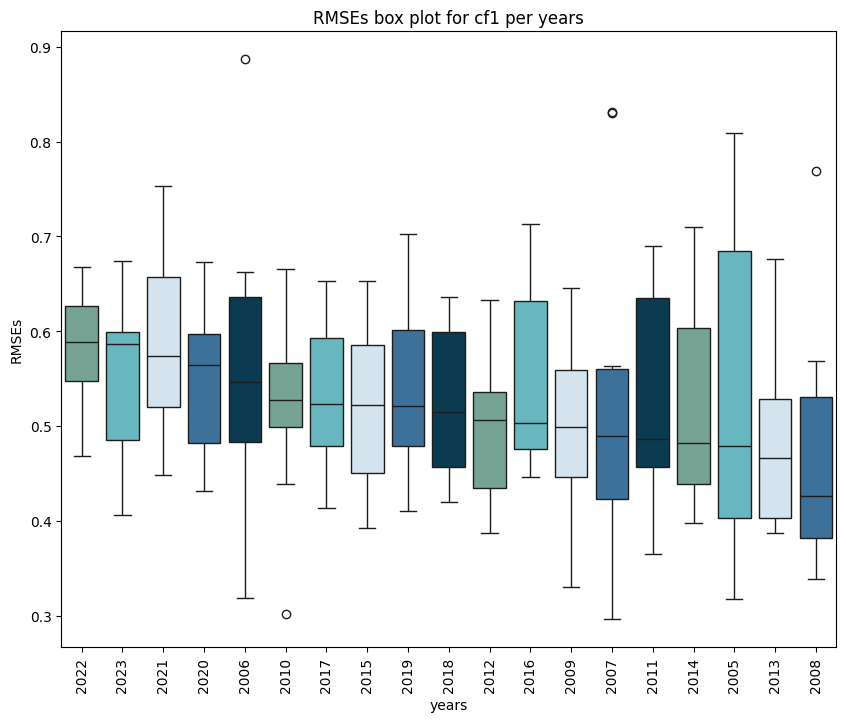

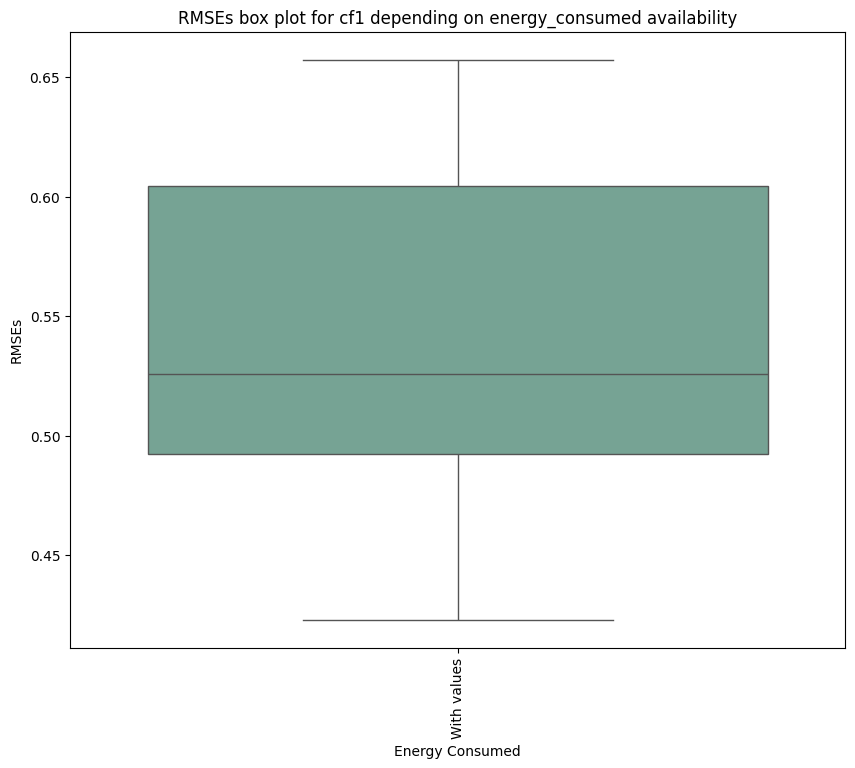

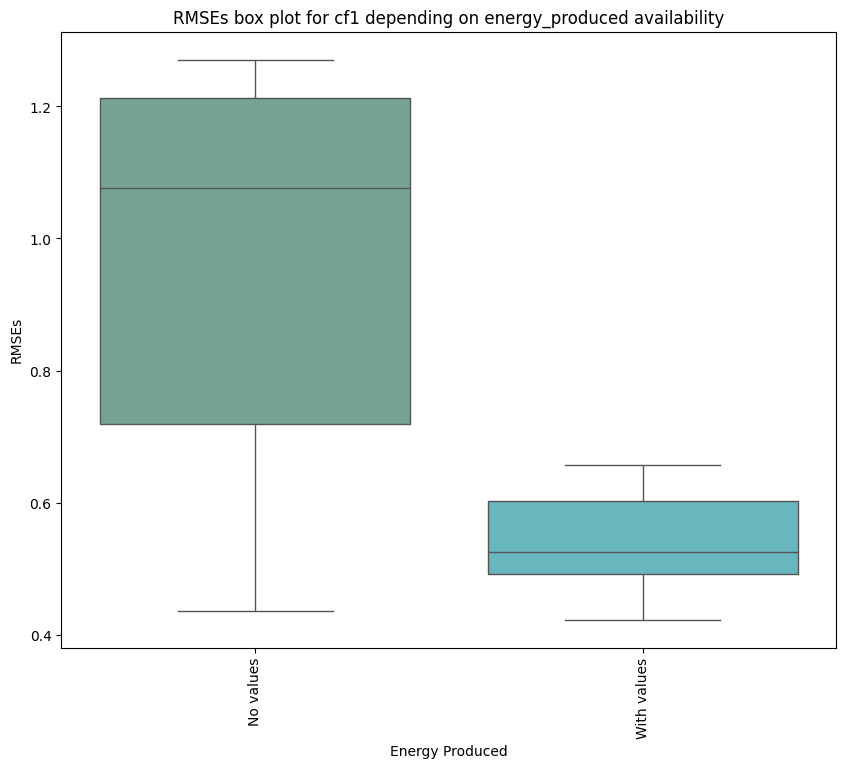

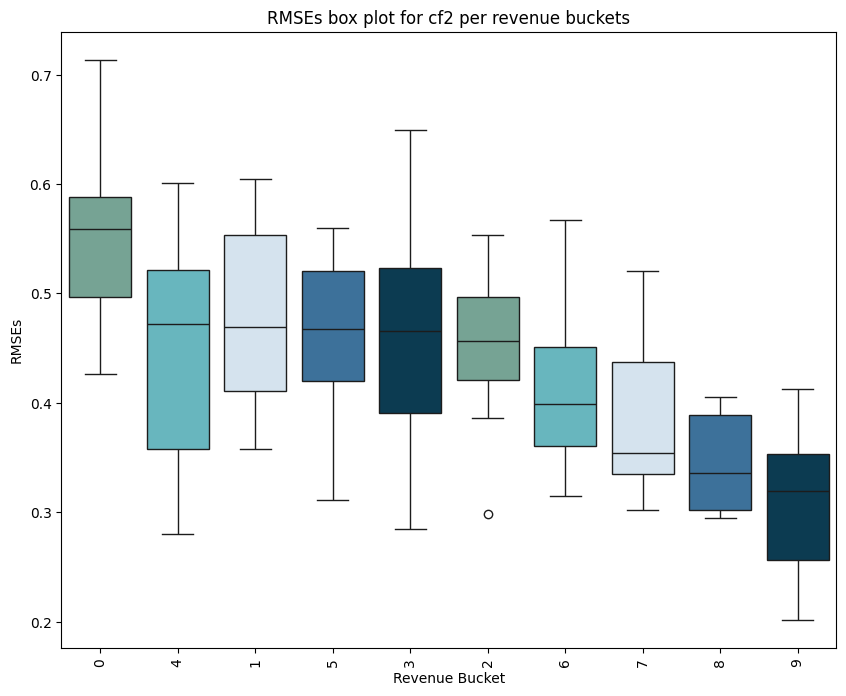

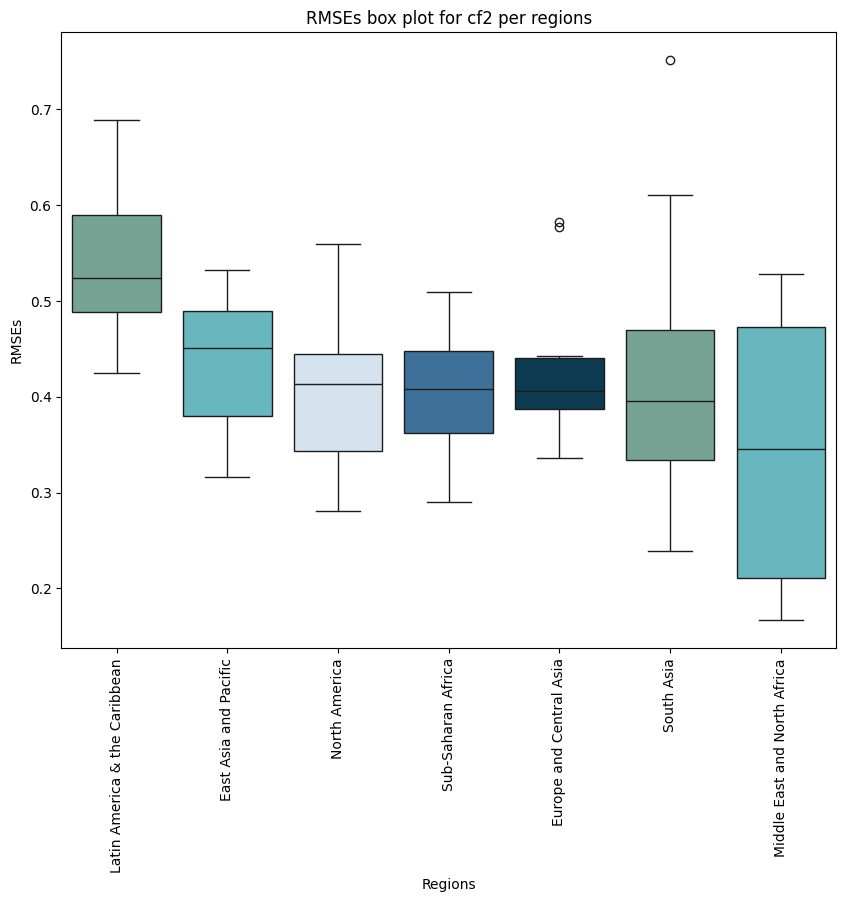

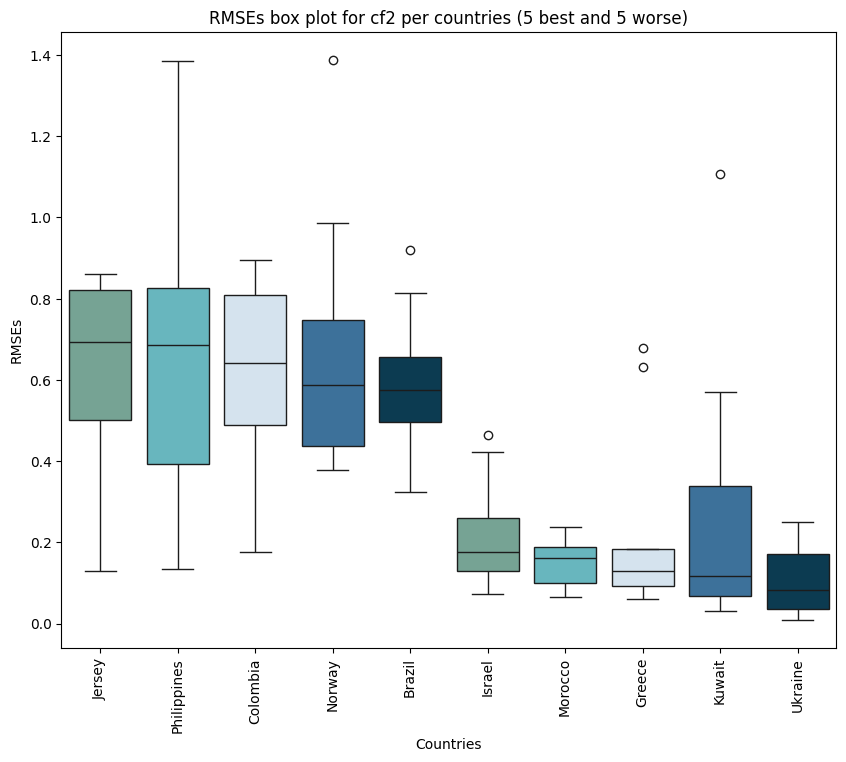

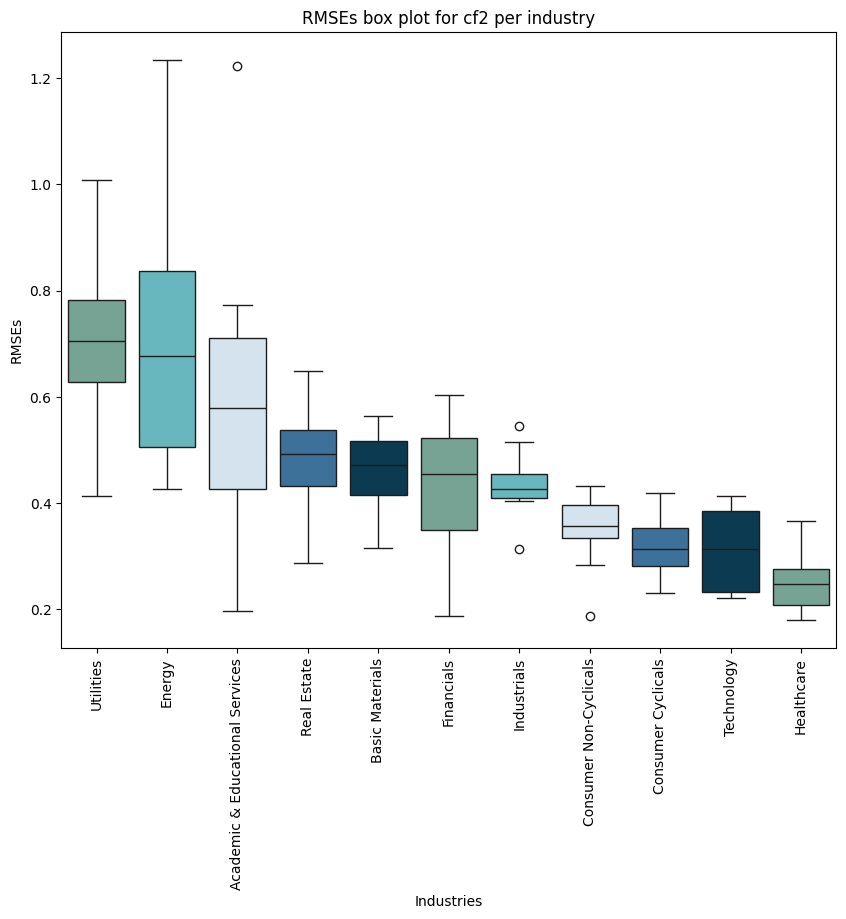

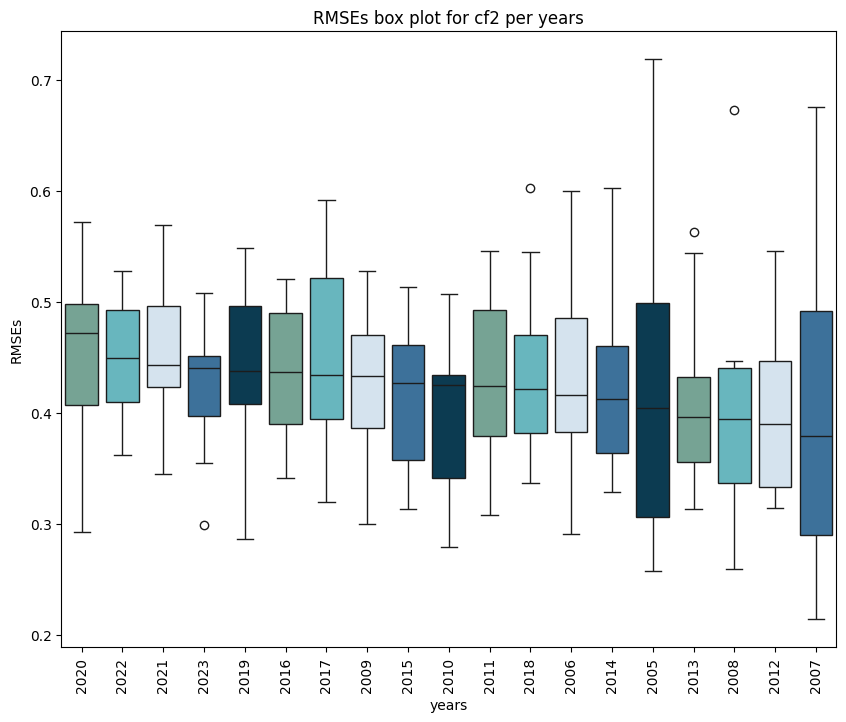

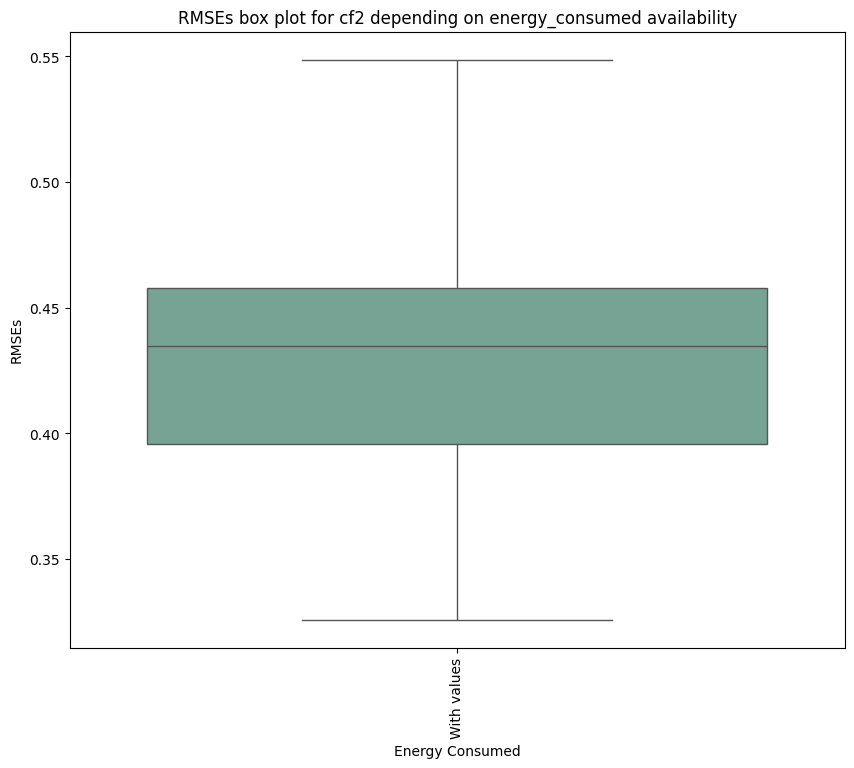

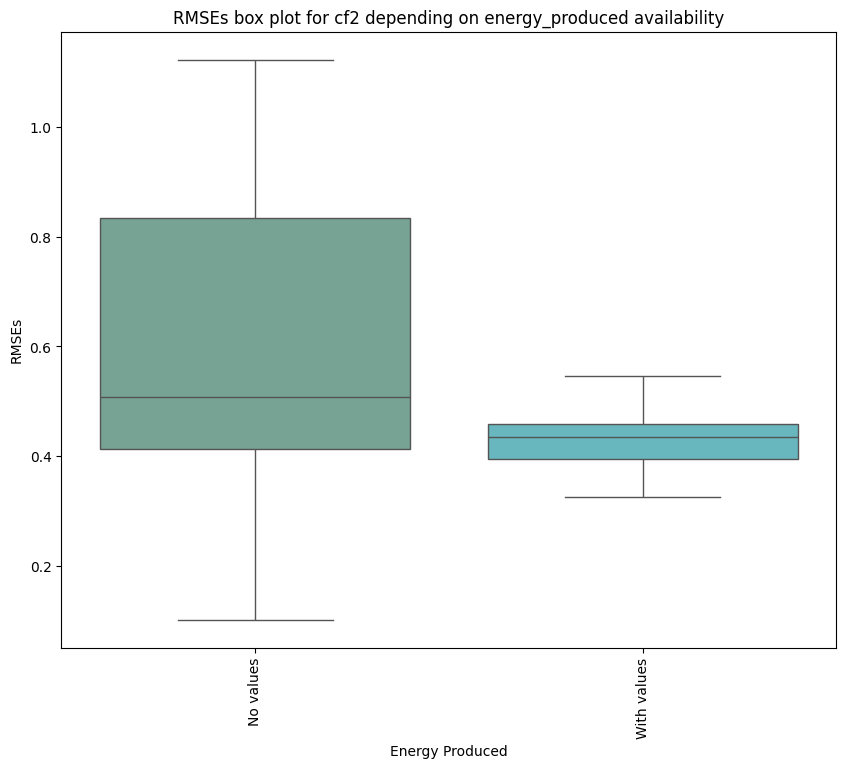

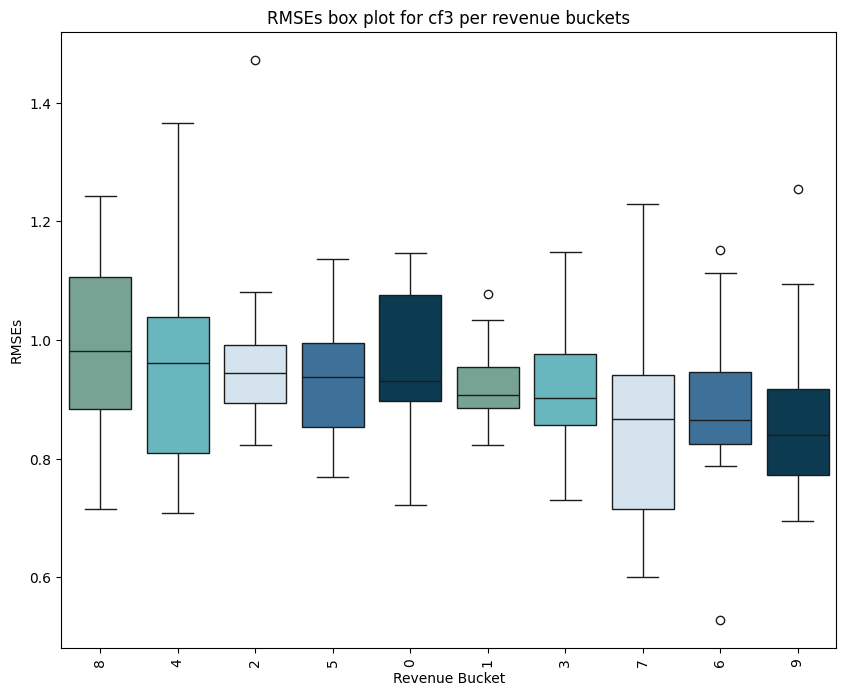

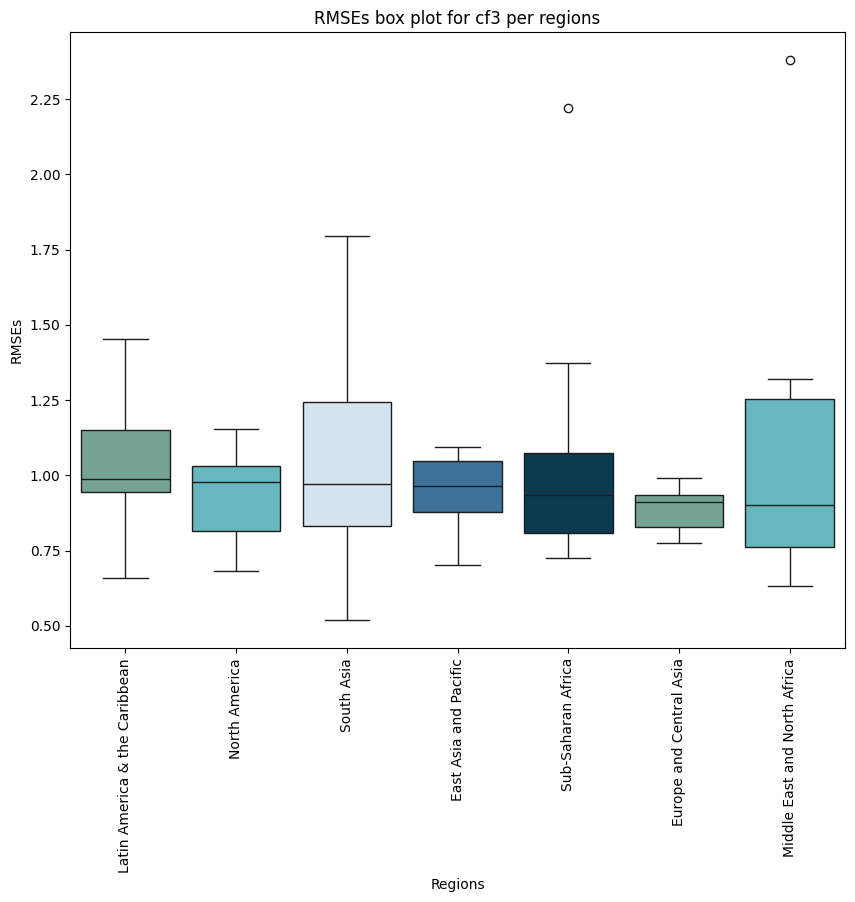

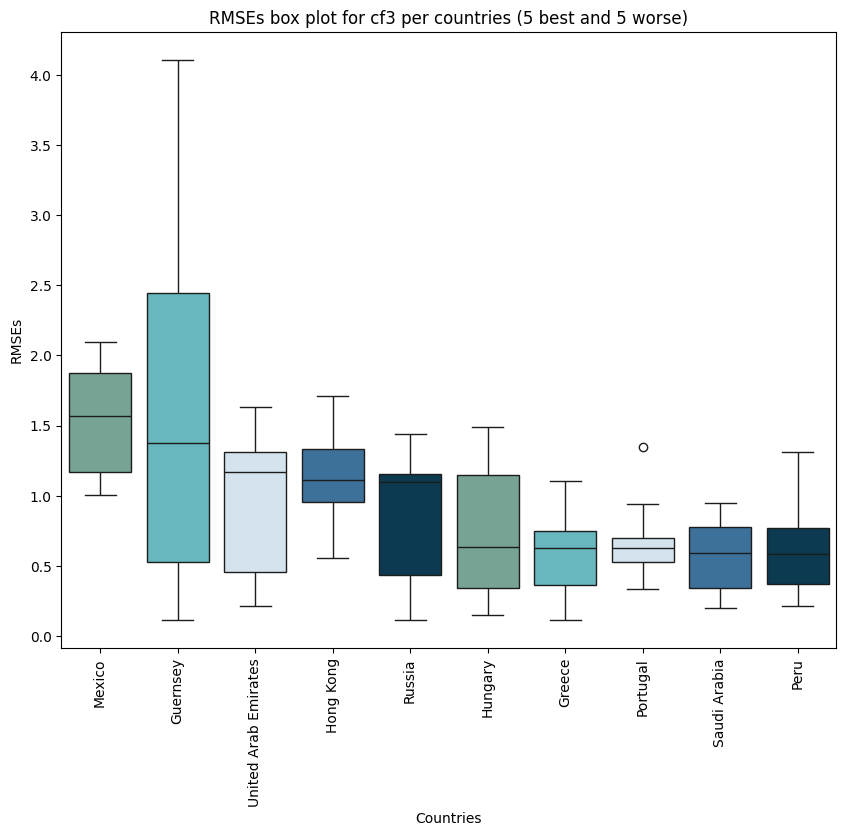

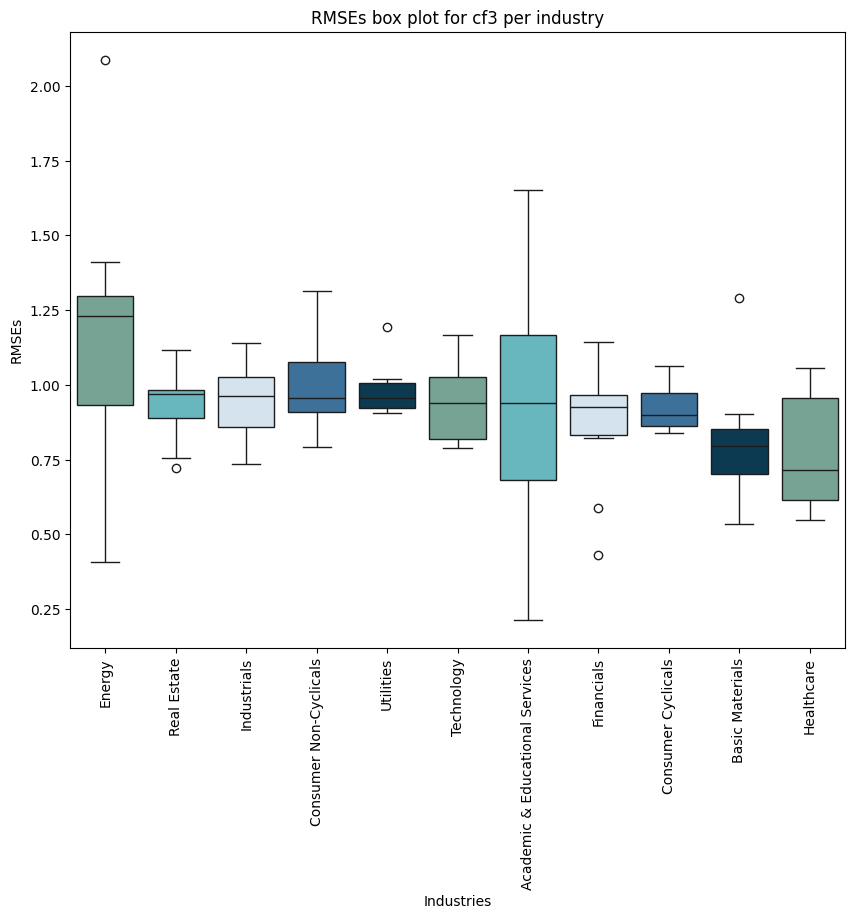

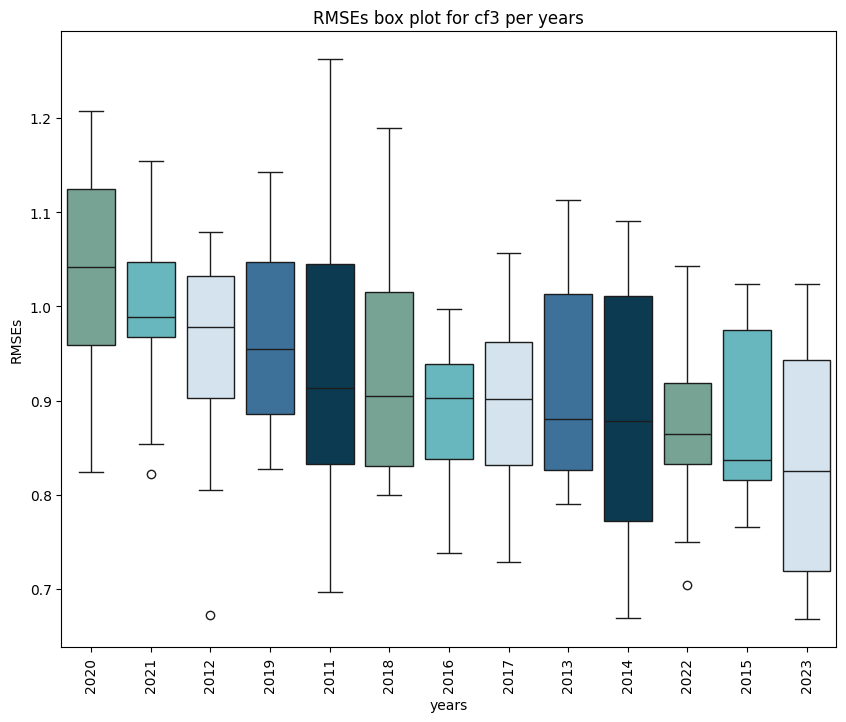

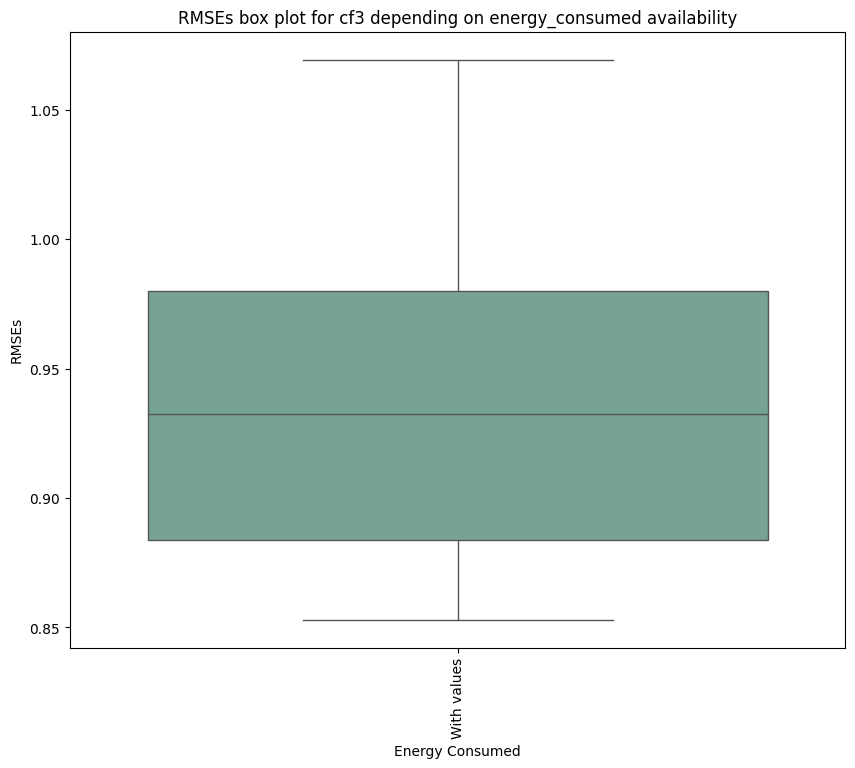

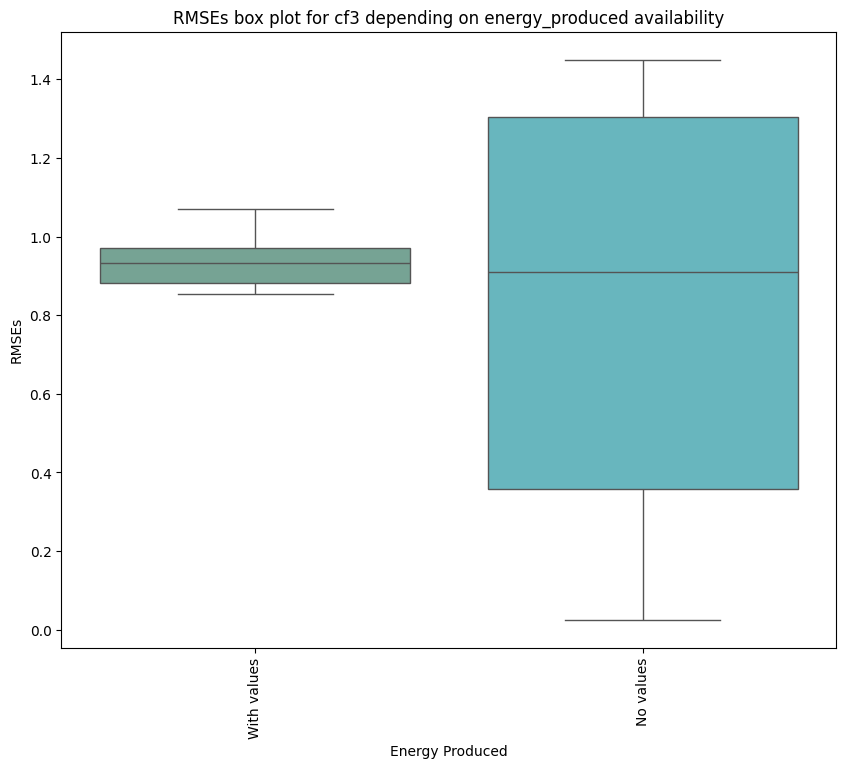

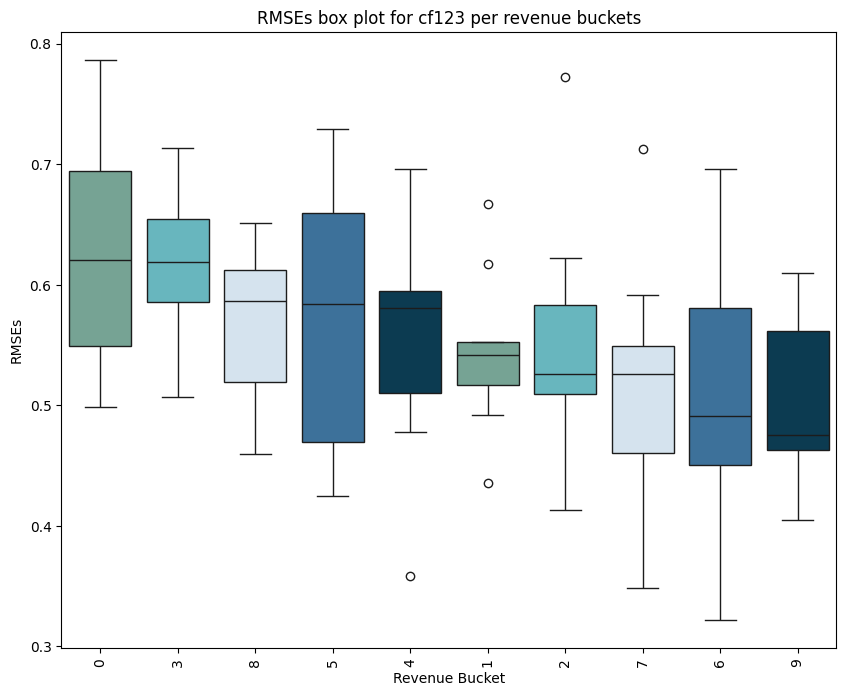

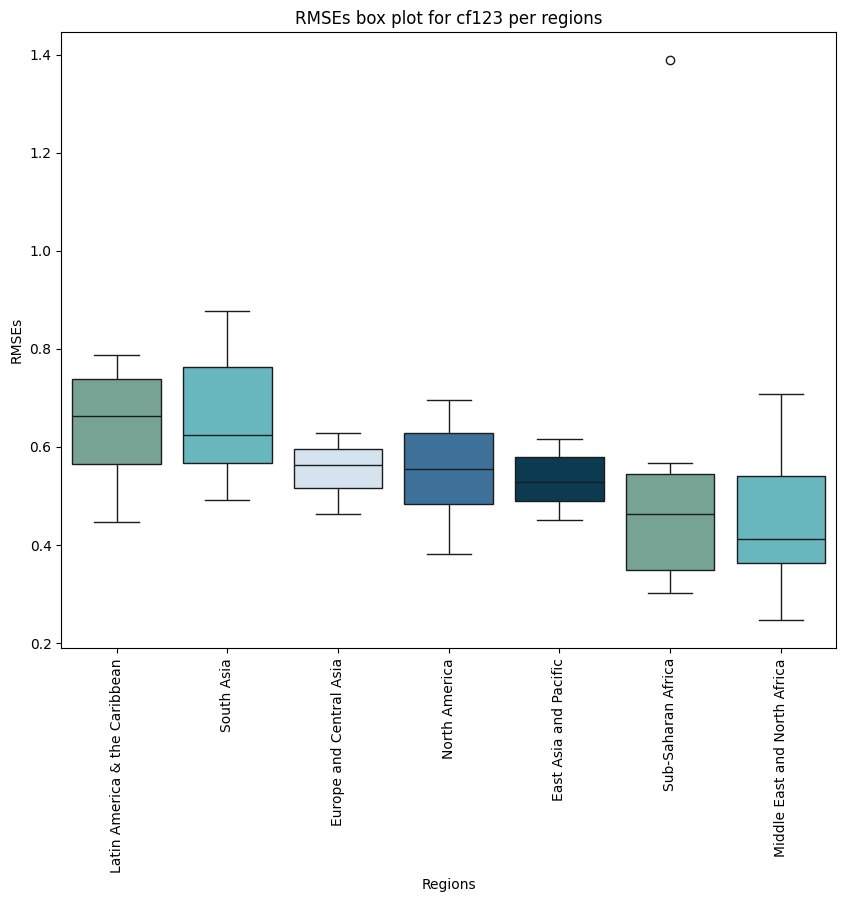

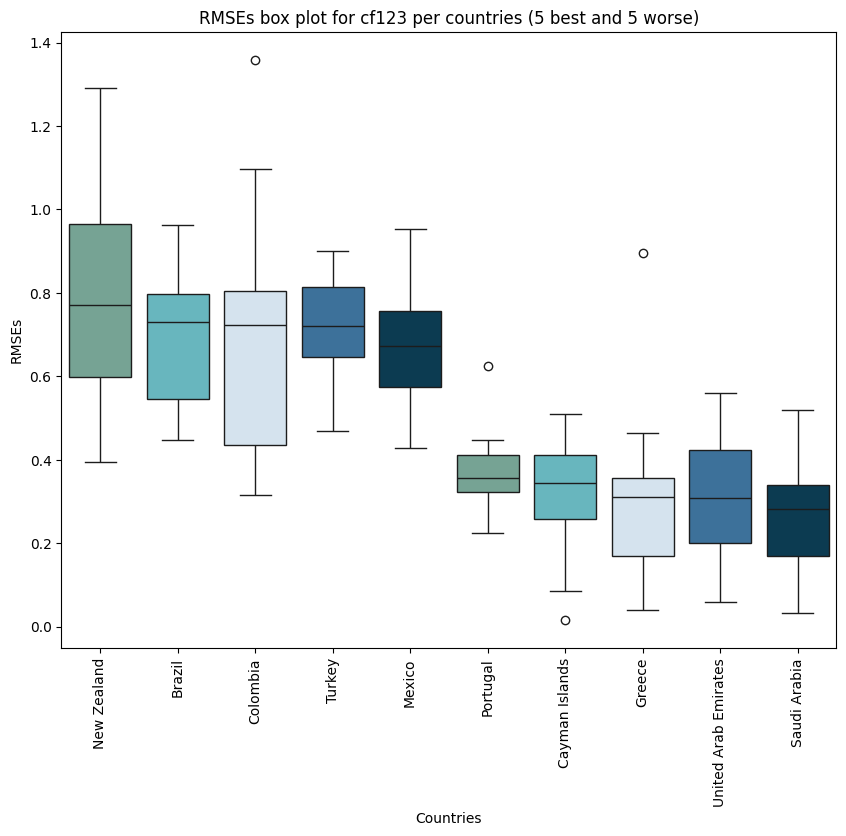

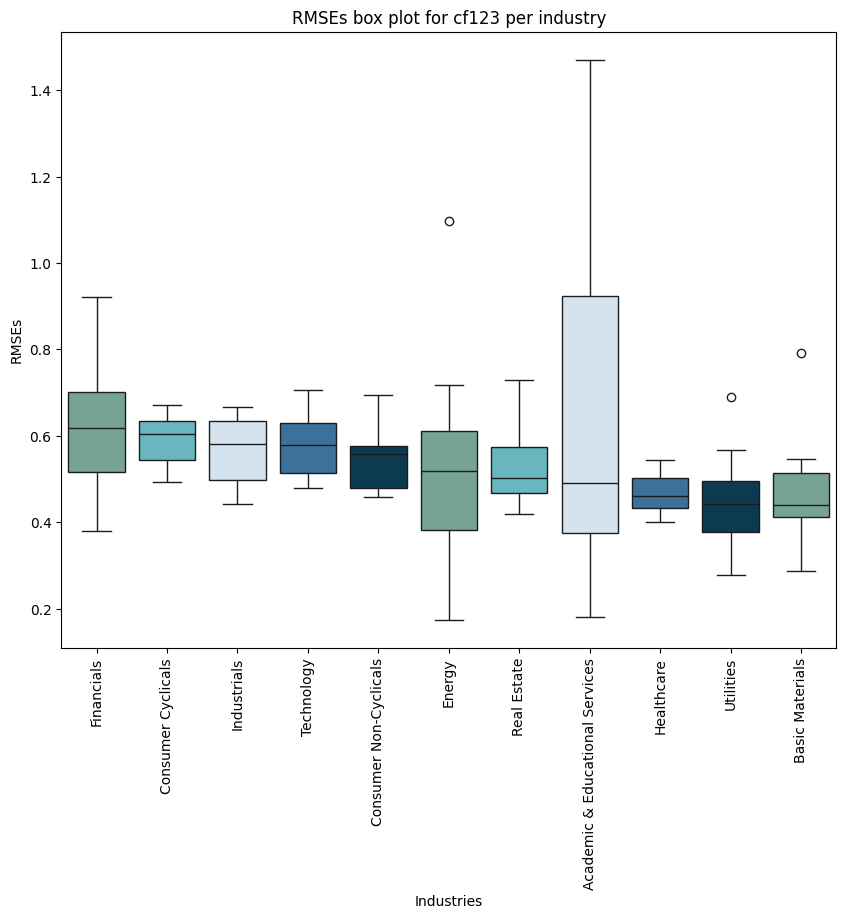

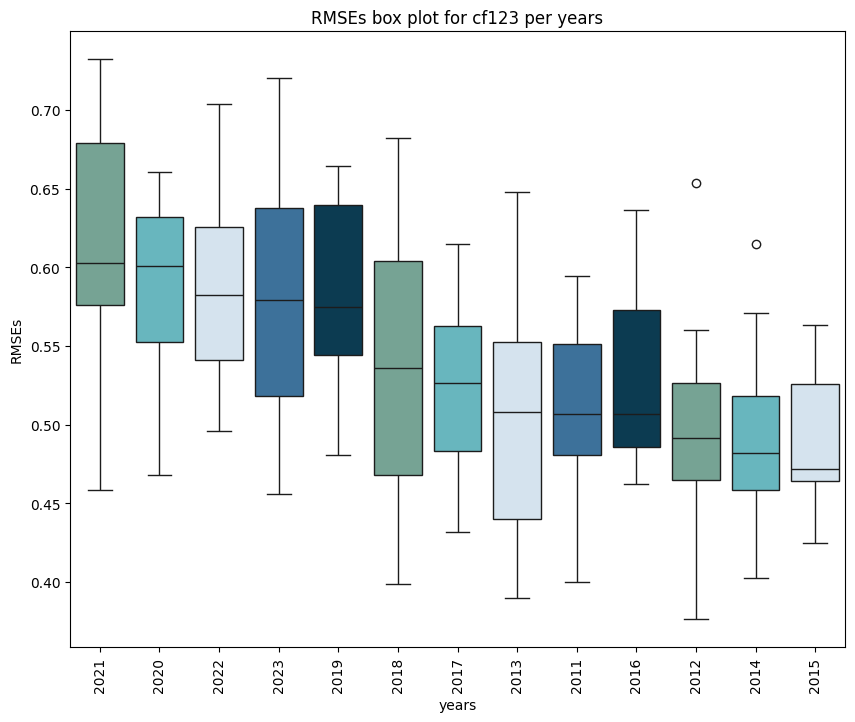

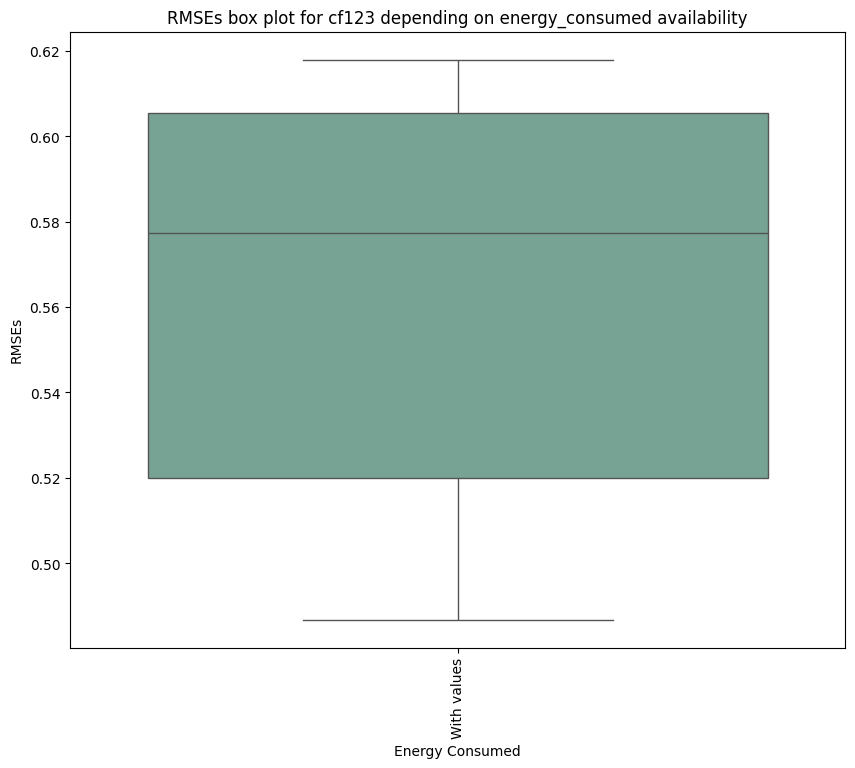

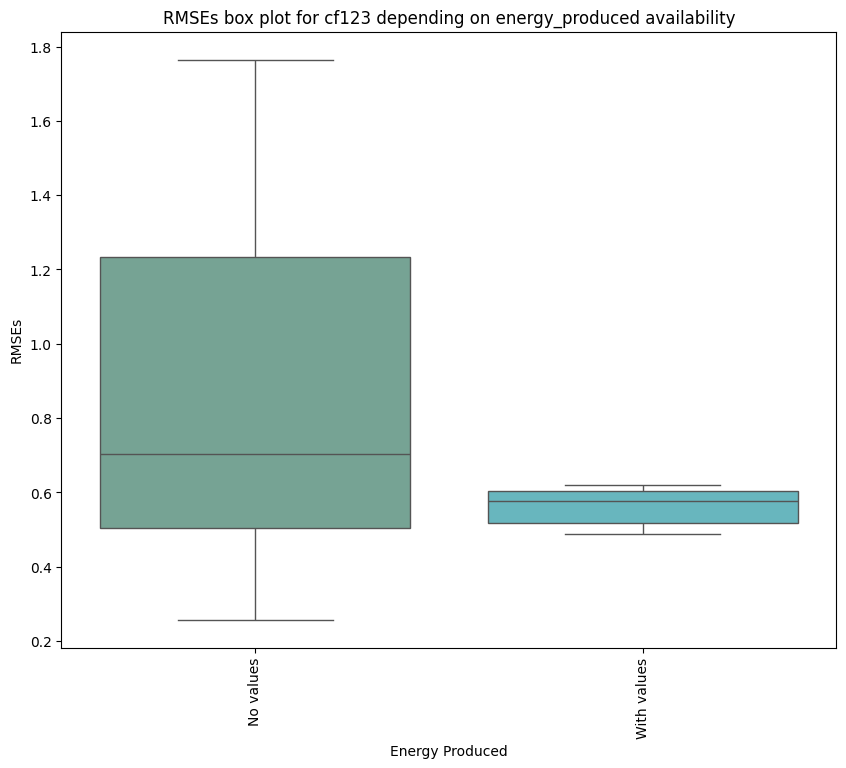

In [7]:
best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    targets=targets,
    models=models,
    summary_final=summary_final,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes=estimated_scopes,
    preprocessed_dataset=data,
    restricted_features=restricted_features,
    save=save,
)

In [ ]:
path_test = "data/intermediary_data/unrestricted_features/df_test_cf1.parquet"